In [1]:
import iris
import sklearn
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from scipy.interpolate import spline, interp1d
from scipy.stats import norm, skew
from scipy.optimize import curve_fit
import scipy as sp
from skewt import skewnorm
%matplotlib inline  

from __future__ import division

In [2]:
def load_temp(n):
    crut_file = "/Users/admin/Downloads/HadCRUT.4.4.0.0.anomalies.1_to_10_netcdf/HadCRUT.4.4.0.0.anomalies.%d.nc"%n
    crut = iris.load(crut_file)
    temp = crut[0]
    for t in range(temp.data.shape[0]):
#         temp.data[t] = temp.data[t] / max(temp.data[t].max(), -temp.data[t].min())
        temp.data[t].set_fill_value(temp.data[t].mean())
    return temp

temps = []
for i in range(1,11):
    temps.append(load_temp(i))
temps

/Users/admin/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1139: UserWarning: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warnings.warn(msg)


[<iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>,
 <iris 'Cube' of near_surface_temperature_anomaly / (K) (time: 1995; latitude: 36; longitude: 72)>]

In [3]:
X = temps[0].data.filled().reshape(1995, 72*36)[1500:]

In [4]:
Xnow = np.array([t.data.filled().reshape(1995, 72*36)[-1] for t in temps])

Now vs. all


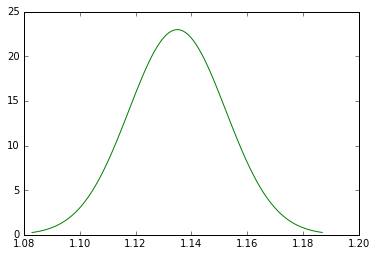

Now vs. seasonal


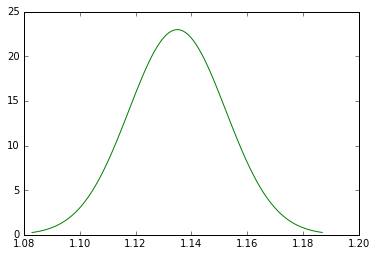

Now vs. all


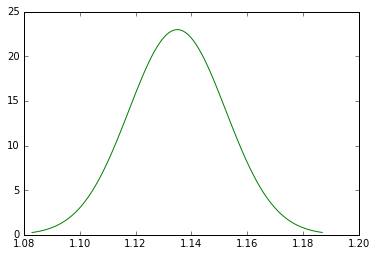

Now vs. seasonal


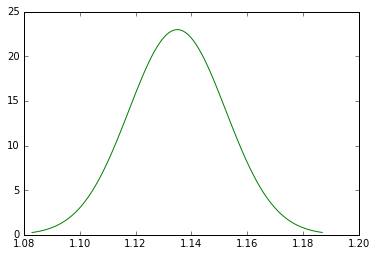

Now vs. all


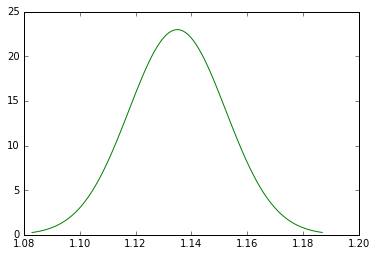

Now vs. seasonal


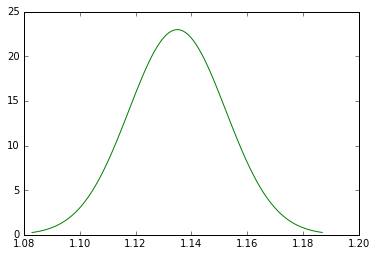

Now vs. all


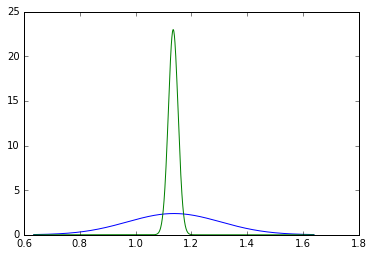

Now vs. seasonal


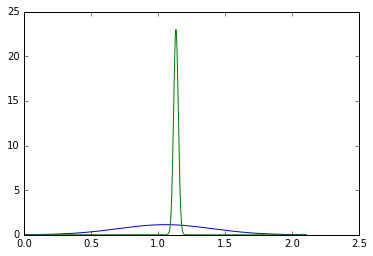

Now vs. all


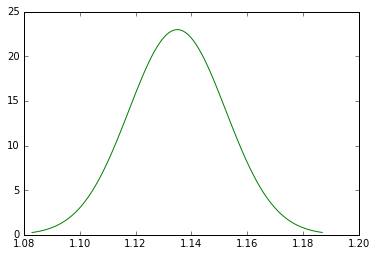

Now vs. seasonal


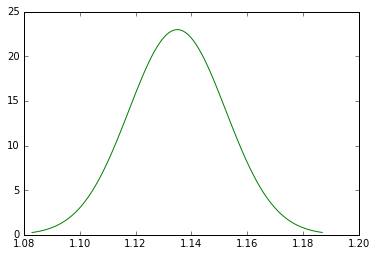

Now vs. all


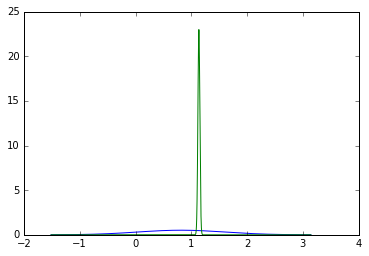

Now vs. seasonal


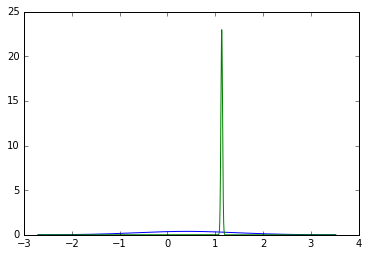

Now vs. all


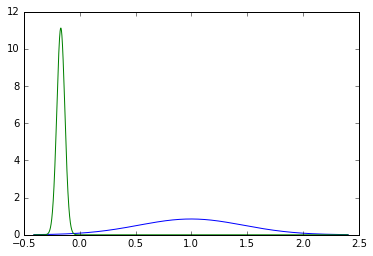

Now vs. seasonal


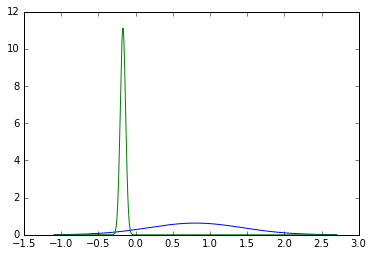

Now vs. all


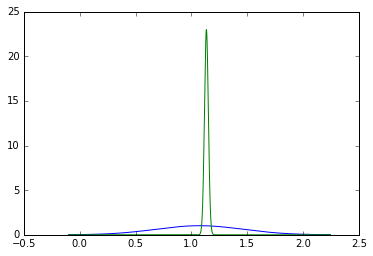

Now vs. seasonal


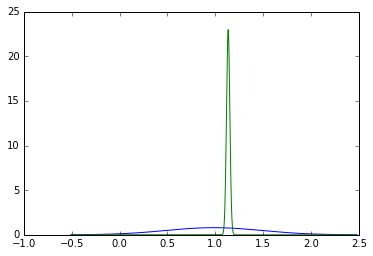

Now vs. all


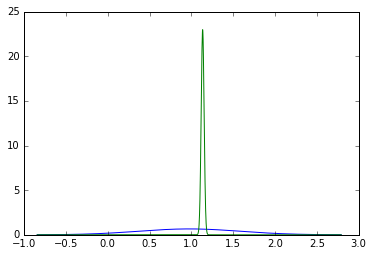

Now vs. seasonal


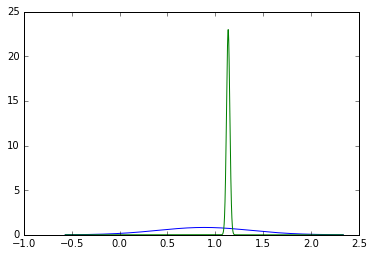

Now vs. all


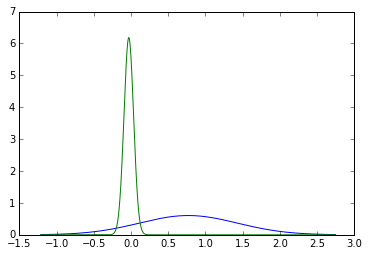

Now vs. seasonal


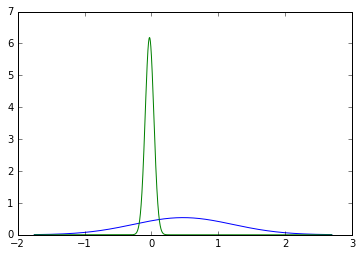

Now vs. all


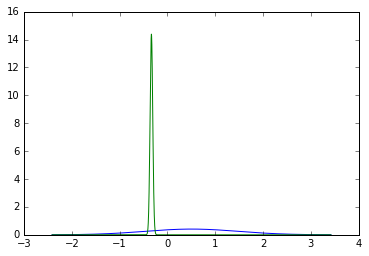

Now vs. seasonal


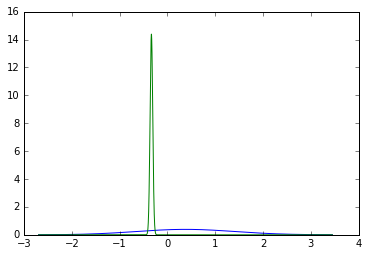

Now vs. all


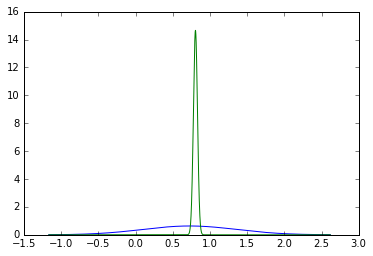

Now vs. seasonal


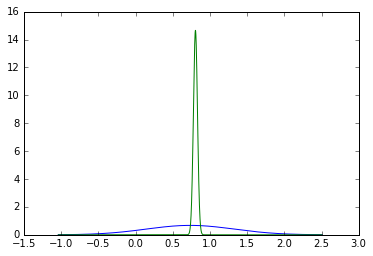

Now vs. all


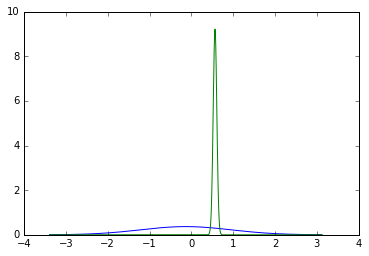

Now vs. seasonal


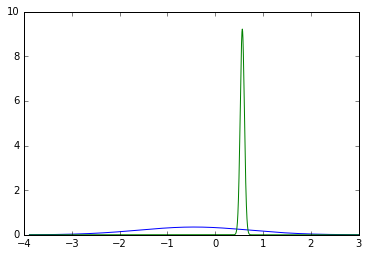

Now vs. all


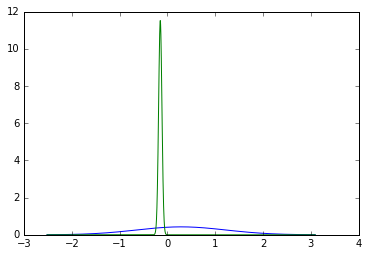

Now vs. seasonal


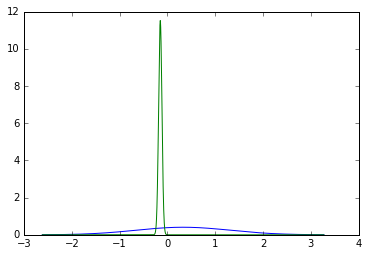

Now vs. all


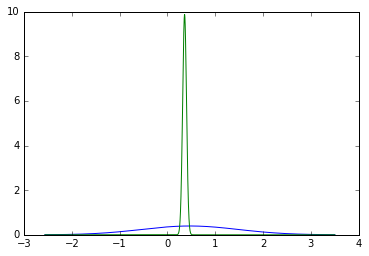

Now vs. seasonal


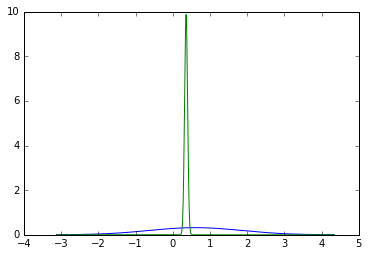

Now vs. all


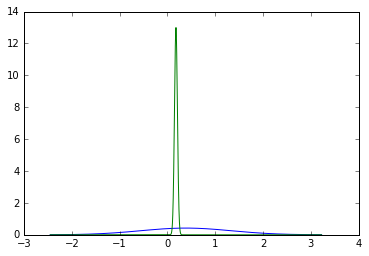

Now vs. seasonal


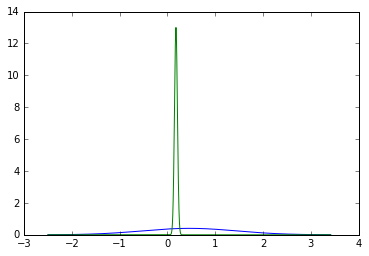

Now vs. all


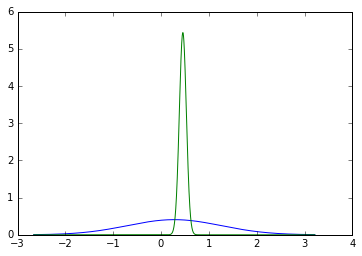

Now vs. seasonal


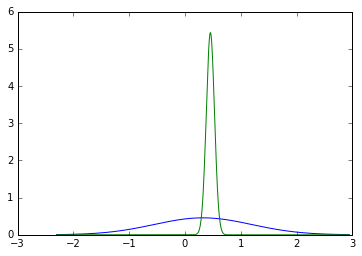

Now vs. all


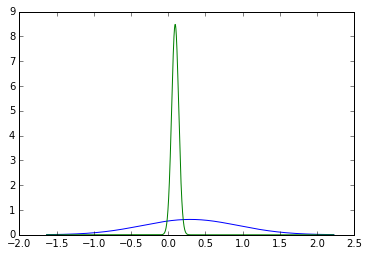

Now vs. seasonal


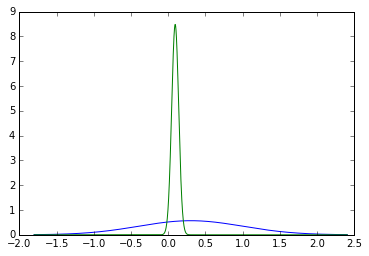

Now vs. all


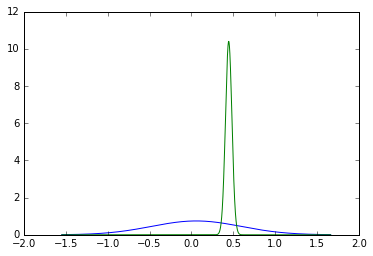

Now vs. seasonal


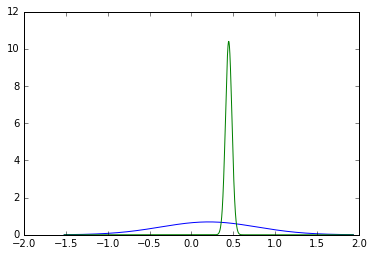

Now vs. all


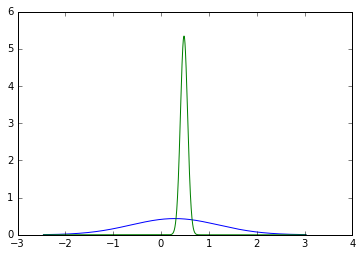

Now vs. seasonal


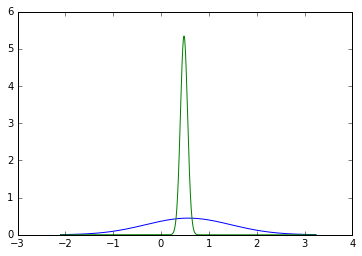

Now vs. all


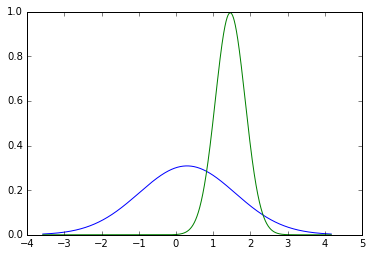

Now vs. seasonal


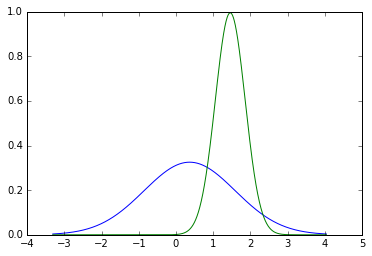

Now vs. all


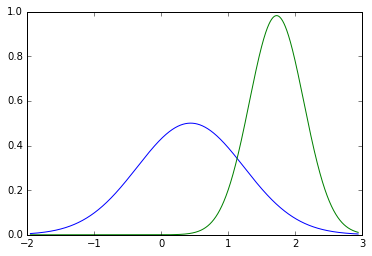

Now vs. seasonal


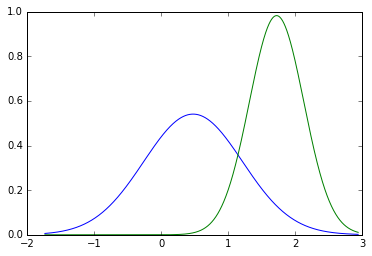

Now vs. all


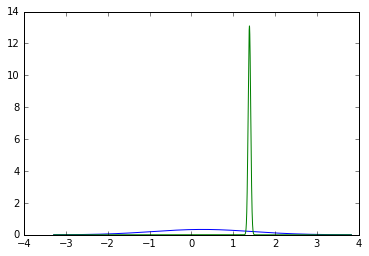

Now vs. seasonal


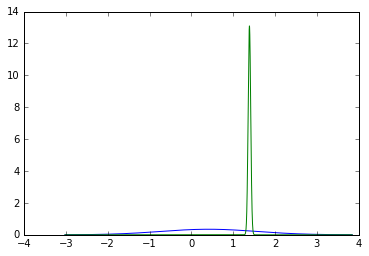

Now vs. all


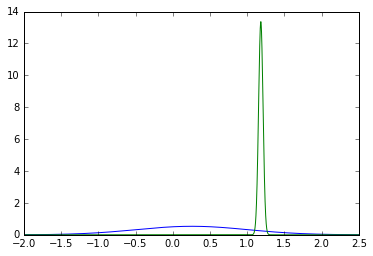

Now vs. seasonal


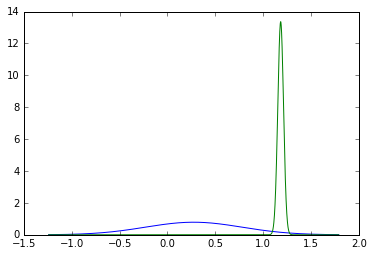

Now vs. all


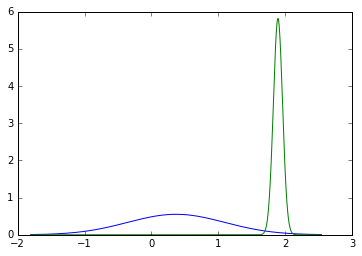

Now vs. seasonal


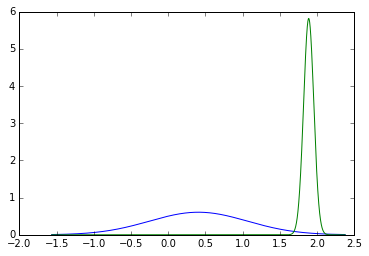

Now vs. all


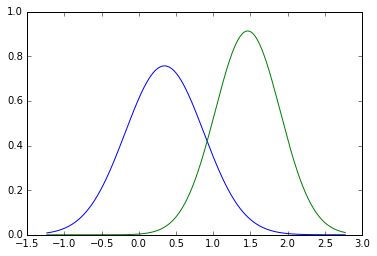

Now vs. seasonal


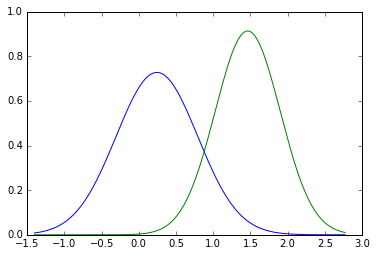

Now vs. all


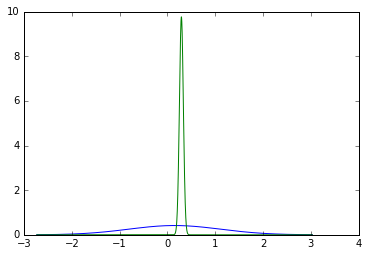

Now vs. seasonal


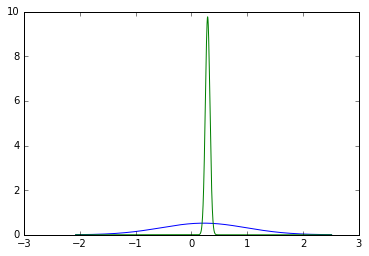

Now vs. all


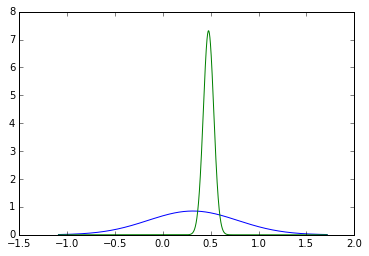

Now vs. seasonal


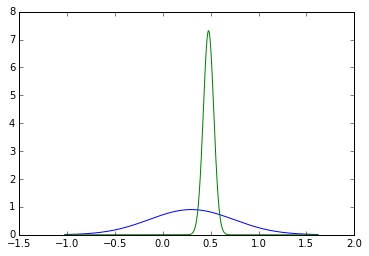

Now vs. all


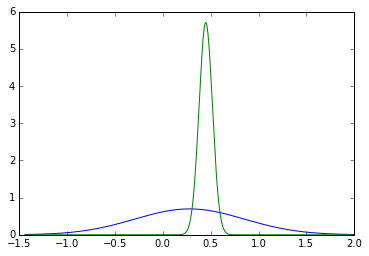

Now vs. seasonal


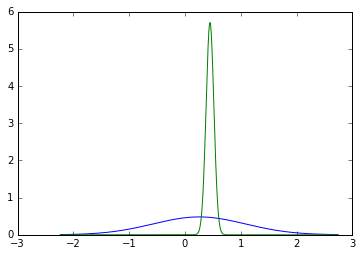

Now vs. all


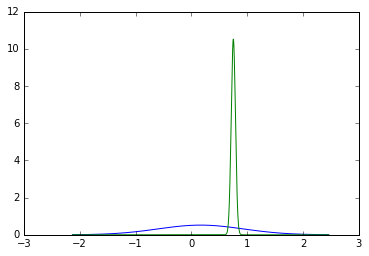

Now vs. seasonal


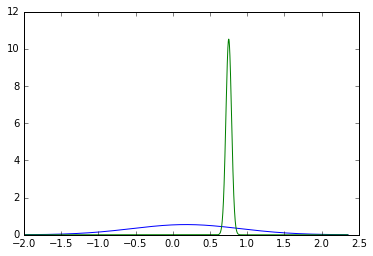

Now vs. all


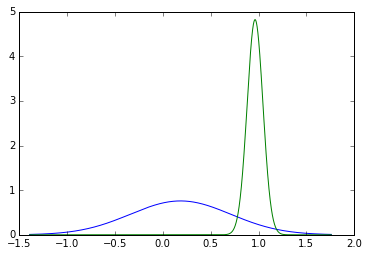

Now vs. seasonal


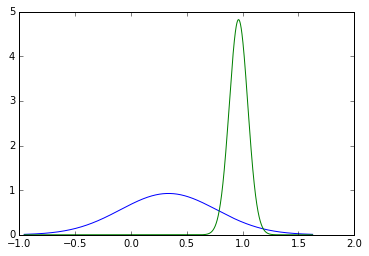

Now vs. all


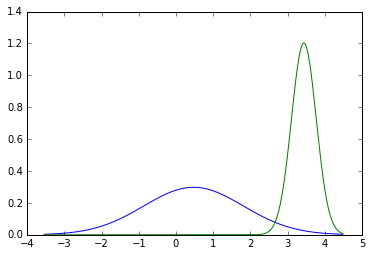

Now vs. seasonal


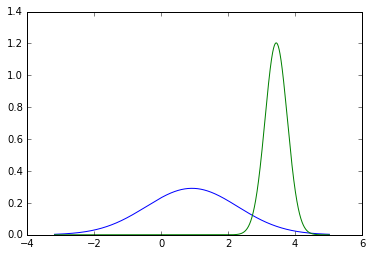

Now vs. all


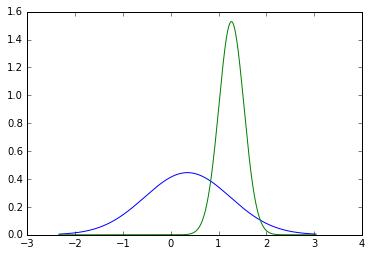

Now vs. seasonal


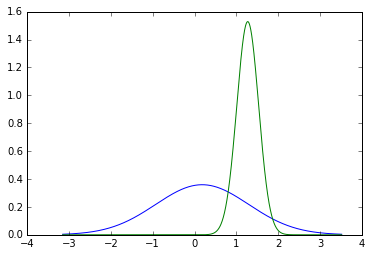

Now vs. all


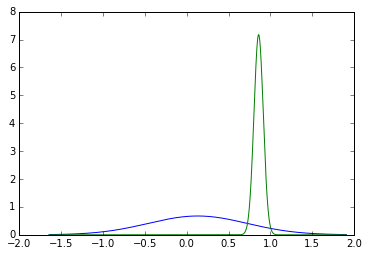

Now vs. seasonal


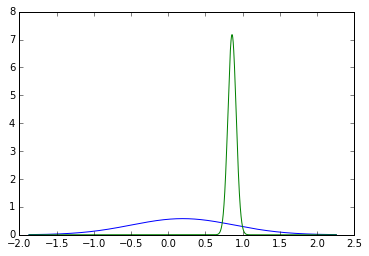

Now vs. all


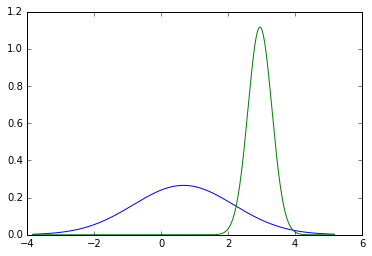

Now vs. seasonal


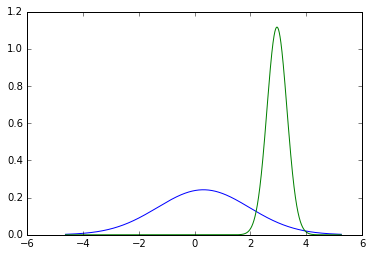

Now vs. all


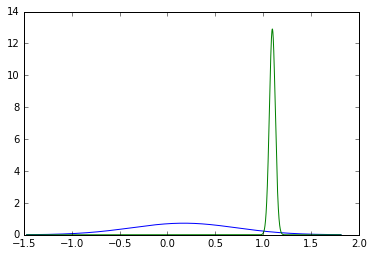

Now vs. seasonal


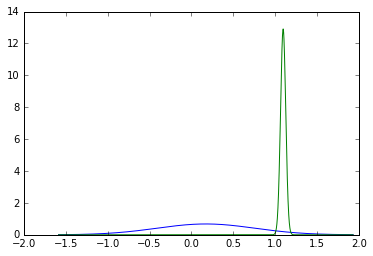

Now vs. all


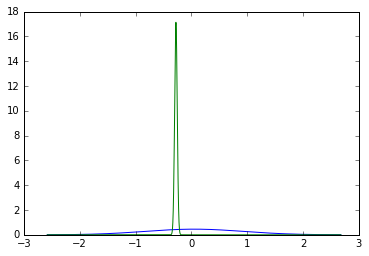

Now vs. seasonal


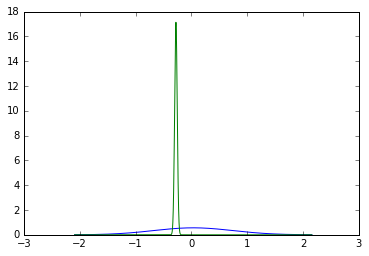

Now vs. all


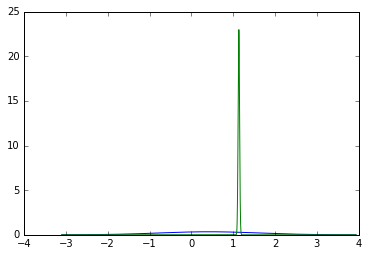

Now vs. seasonal


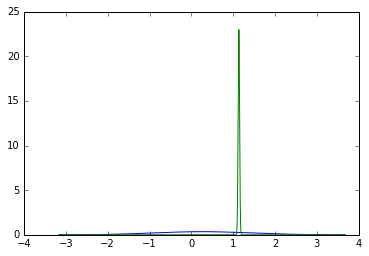

Now vs. all


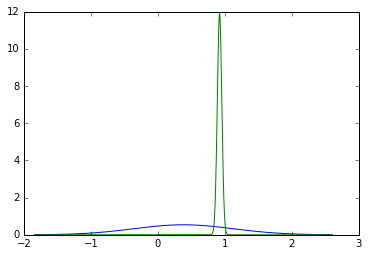

Now vs. seasonal


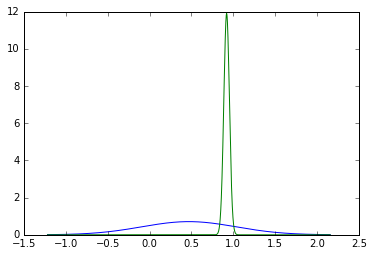

Now vs. all


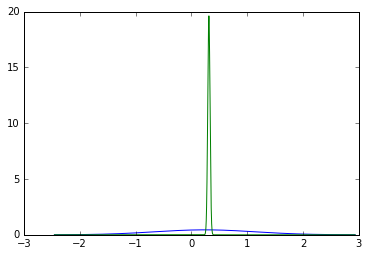

Now vs. seasonal


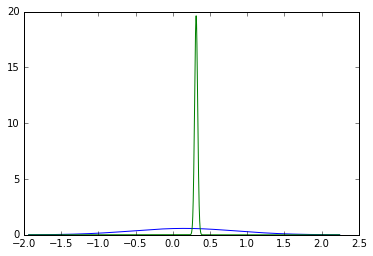

Now vs. all


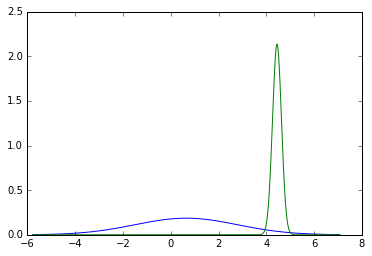

Now vs. seasonal


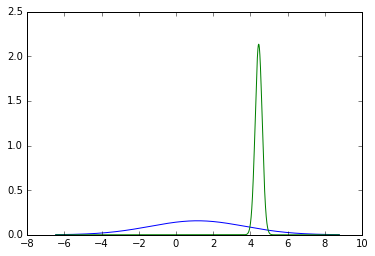

Now vs. all


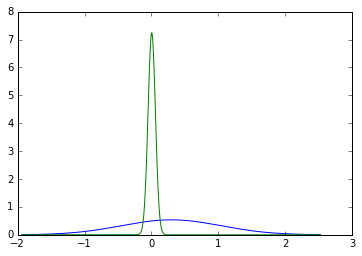

Now vs. seasonal


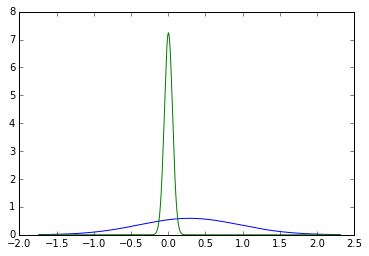

Now vs. all


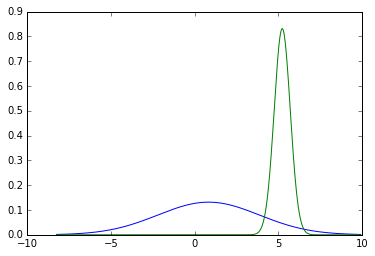

Now vs. seasonal


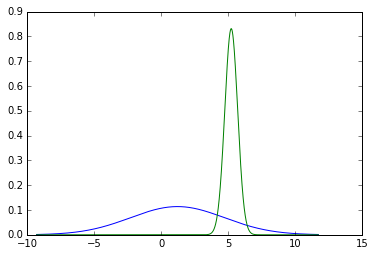

Now vs. all


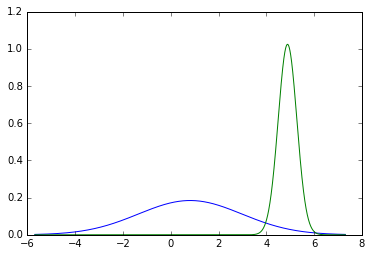

Now vs. seasonal


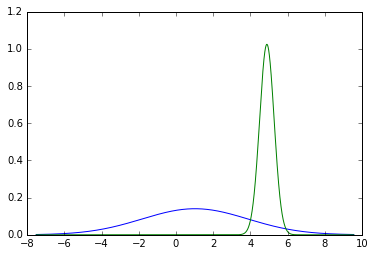

Now vs. all


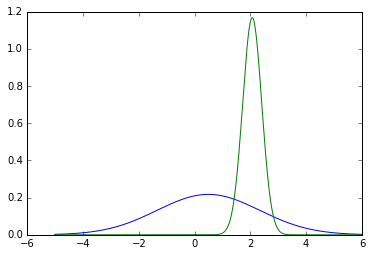

Now vs. seasonal


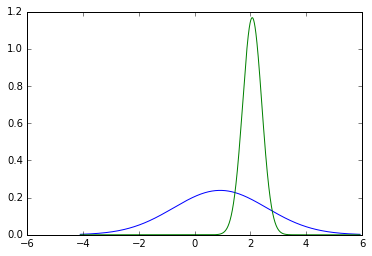

Now vs. all


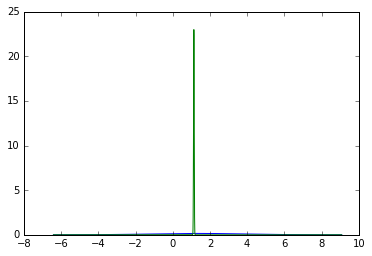

Now vs. seasonal


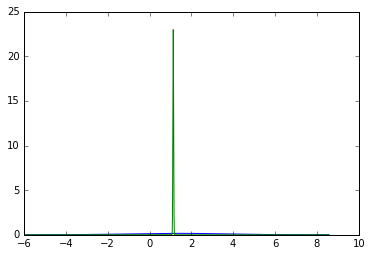

Now vs. all


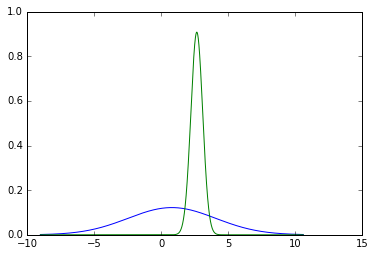

Now vs. seasonal


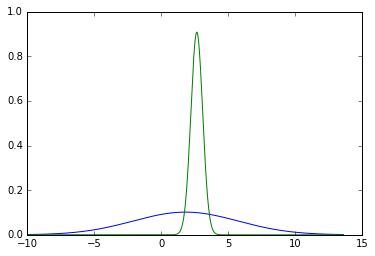

Now vs. all


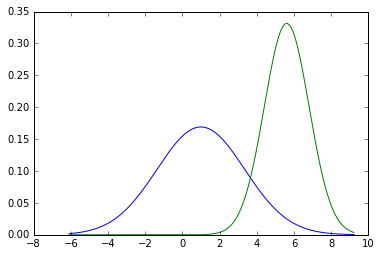

Now vs. seasonal


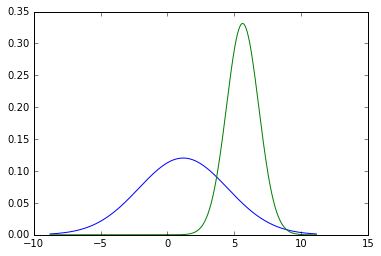

Now vs. all


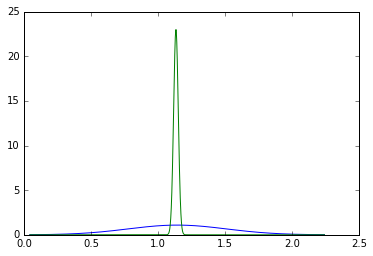

Now vs. seasonal


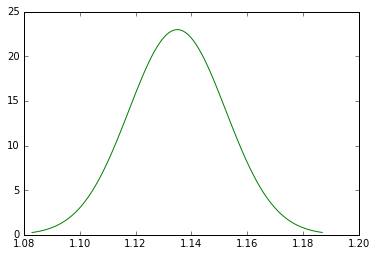

Now vs. all


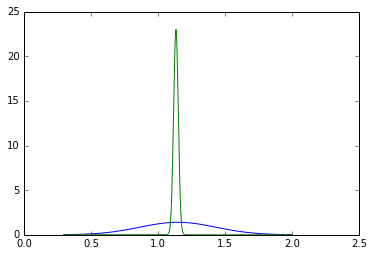

Now vs. seasonal


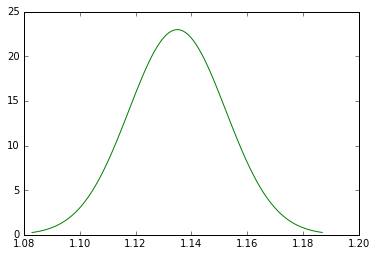

Now vs. all


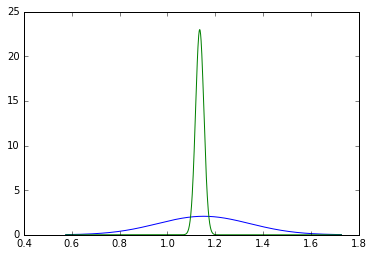

Now vs. seasonal


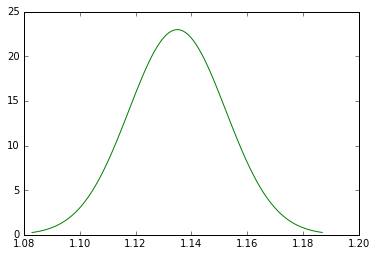

Now vs. all


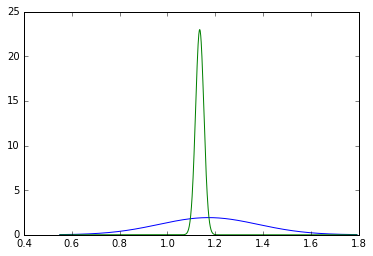

Now vs. seasonal


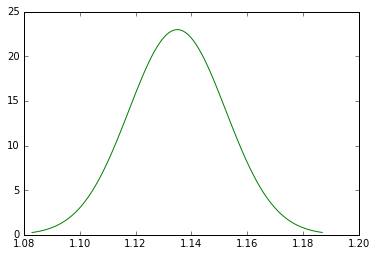

In [6]:
for i in range(0,X.shape[1],50):
    def lowest(a):
        return np.mean(a) - 3*np.std(a)
    def highest(a):
        return np.mean(a) + 3*np.std(a)
    
    Xsea = X[np.arange(X.shape[0]-1, 0, -12)]
    
    print "Now vs. all"
    xs = np.arange(min(lowest(X[:,i]), lowest(Xnow[:,i])), max(highest(X[:,i]), highest(Xnow[:,i])), 0.001)
    plt.plot(xs, norm.pdf(xs, np.mean(X[:,i]), np.std(X[:,i])))
    plt.plot(xs, norm.pdf(xs, np.mean(Xnow[:,i]), np.std(Xnow[:,i])))
    plt.show()
    
    print "Now vs. seasonal"
    xs = np.arange(min(lowest(Xsea[:,i]), lowest(Xnow[:,i])), max(highest(Xsea[:,i]), highest(Xnow[:,i])), 0.001)
    plt.plot(xs, norm.pdf(xs, np.mean(Xsea[:,i]), np.std(Xsea[:,i])))
    plt.plot(xs, norm.pdf(xs, np.mean(Xnow[:,i]), np.std(Xnow[:,i])))
    plt.show()